# Coin Detection using Morphological operations 

## Name : Sai Hrishi M
## Reg No : 212224240140


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
img=cv2.imread(r"C:\Users\admin\Downloads\CoinsA.png")

In [49]:
image=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

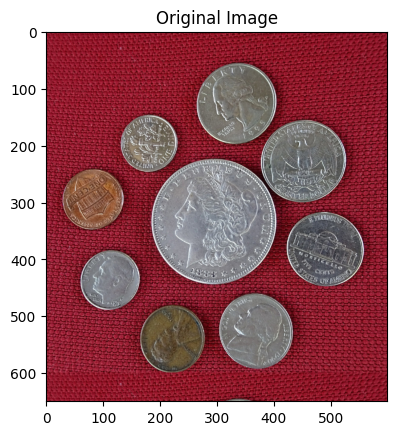

In [50]:
imageCopy = image.copy()
plt.imshow(image)
plt.title("Original Image")
plt.show()

# Convert Image to Grayscale¶

In [51]:
imageGray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

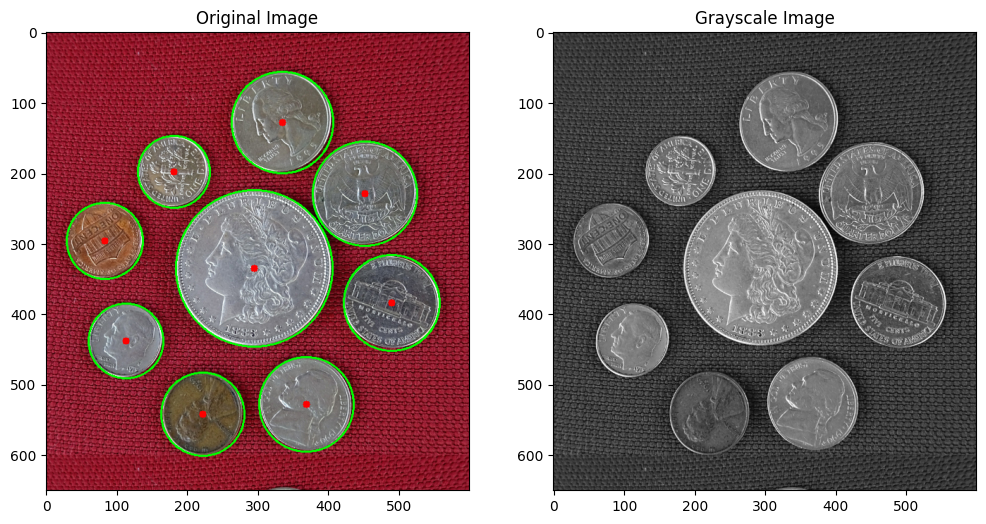

In [69]:
plt.figure(figsize=(12,12))
plt.subplot(121);plt.imshow(image);plt.title("Original Image")
plt.subplot(122); plt.imshow(imageGray,cmap='gray');plt.title("Grayscale Image"); 
plt.show()

# Split Image into R,G,B Channels

In [53]:
imageR,imageG,imageB=cv2.split(image)

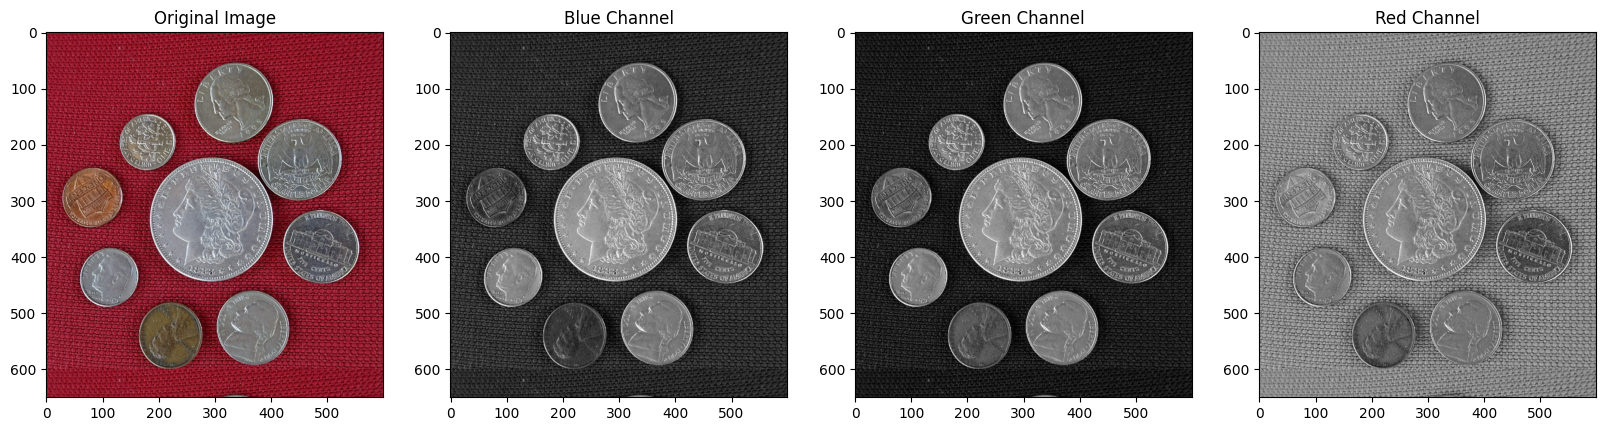

In [54]:
plt.figure(figsize=(20,12))
plt.subplot(141);plt.imshow(image);plt.title("Original Image")
plt.subplot(142);plt.imshow(imageB,cmap='gray');plt.title("Blue Channel")
plt.subplot(143);plt.imshow(imageG,cmap='gray');plt.title("Green Channel")
plt.subplot(144);plt.imshow(imageR,cmap='gray');plt.title("Red Channel");
plt.show()
# Expected output

# Perform Thresholding

In [55]:
ret, thresh_inv = cv2.threshold(imageG, 20,255, cv2.THRESH_BINARY_INV)

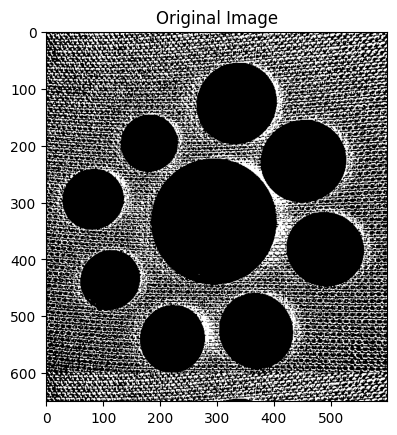

In [56]:
plt.imshow(thresh_inv,cmap='gray');
plt.title("Original Image")
plt.show()

# Perform morphological operations

In [57]:
kernel=np.ones((8,8),dtype=np.uint8)

In [58]:
dilution=cv2.dilate(thresh_inv,kernel,iterations=1)

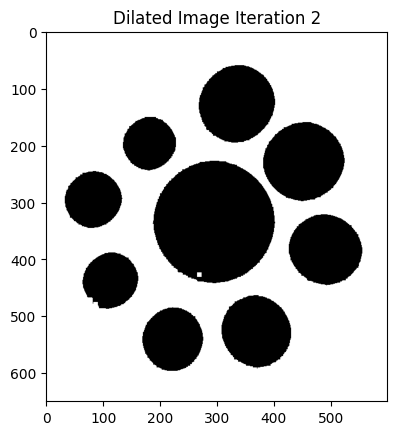

In [59]:

plt.imshow(dilution,cmap='gray');plt.title('Dilated Image Iteration 2');plt.show()
# Expected output

In [60]:
erosion=cv2.erode(dilution,kernel,iterations=1)

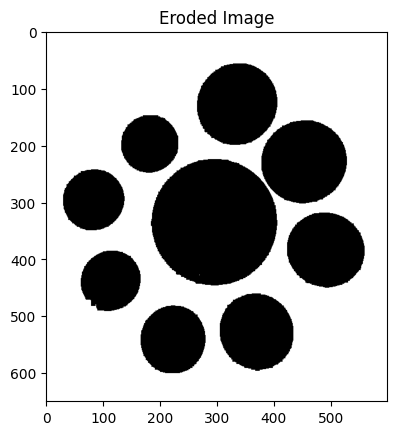

In [61]:

plt.imshow(erosion,cmap='gray');plt.title("Eroded Image");plt.show()
# Expected output

#  Create SimpleBlobDetector

In [62]:
# Set up the SimpleBlobdetector with default parameters.
params = cv2.SimpleBlobDetector_Params()

params.blobColor = 0

params.minDistBetweenBlobs = 2

# Filter by Area.
params.filterByArea = False

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.8

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.8

# Filter by Inertia
params.filterByInertia =True
params.minInertiaRatio = 0.8

In [63]:
# Create SimpleBlobDetector
detector = cv2.SimpleBlobDetector_create(params)

# Detect Coins

In [64]:
keypoints = detector.detect(erosion)

In [65]:
# Print number of coins detected

print(f"Number of coins detected: {len(keypoints)}")

Number of coins detected: 9


In [66]:
for k in keypoints:
    x,y =k.pt
    x=int(round(x))
    y=int(round(y))

    cv2.circle(image,(x,y),5,(255,0,0),-1)

    diameter = k.size
    radius = int(round(diameter/2))

    cv2.circle(image,(x,y),radius,(0,255,0),2)

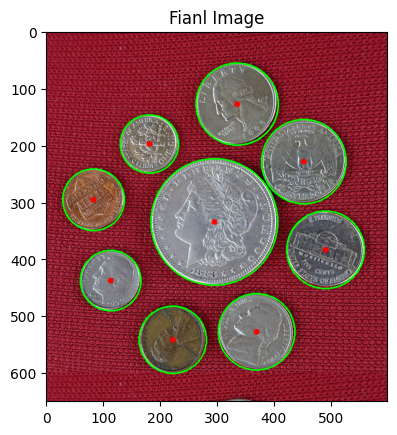

In [67]:
plt.imshow(image,cmap="gray")
plt.title("Fianl Image")
plt.show()
